In [1]:
# 1) ultralytics 설치 (YOLOv8)
!pip install -q ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.6 MB/s eta 0:00:00


포즈 추정할 이미지를 업로드해주세요 (사람이 포함된 이미지):


Saving 마라톤.jpg to 마라톤 (1).jpg
업로드된 파일: 마라톤 (1).jpg

image 1/1 /content/마라톤 (1).jpg: 448x640 2 persons, 203.1ms
Speed: 6.2ms preprocess, 203.1ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


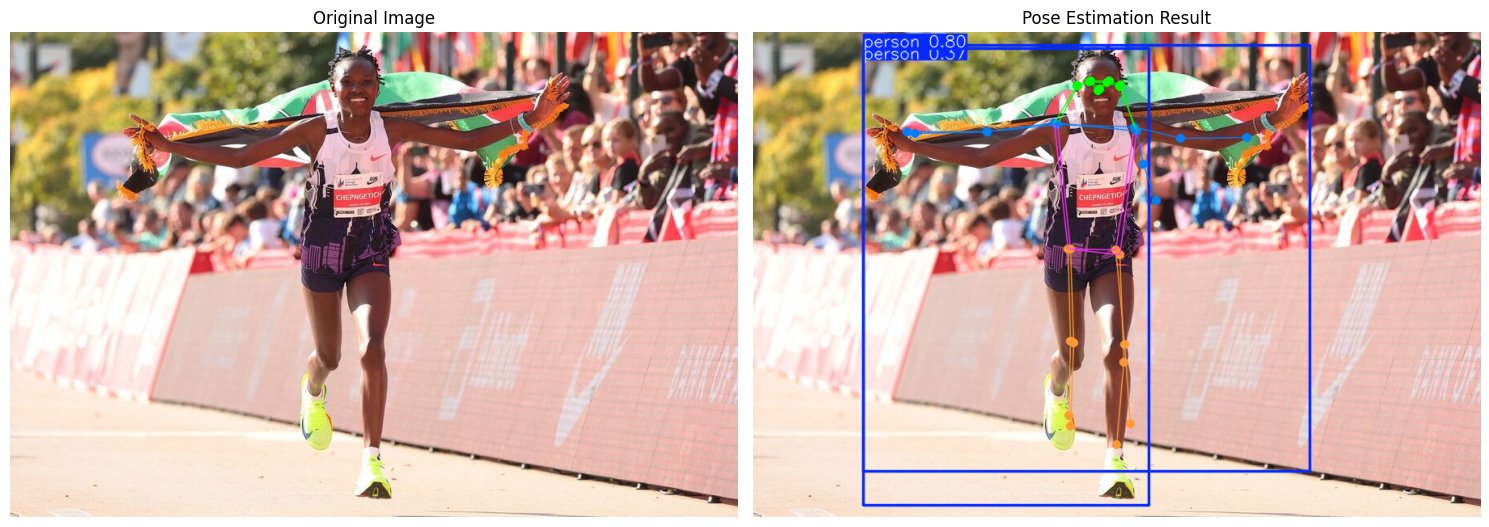


=== 감지된 키포인트 좌표 ===

총 2명의 사람이 감지되었습니다.

--- 사람 1 ---
         코: (426.5, 72.5)
       왼쪽눈: (437.6, 62.9)
      오른쪽눈: (415.4, 61.7)
       왼쪽귀: (453.8, 67.7)
      오른쪽귀: (400.7, 66.6)
      왼쪽어깨: (474.7, 122.6)
     오른쪽어깨: (372.9, 112.8)
     왼쪽팔꿈치: (482.6, 163.8)
    오른쪽팔꿈치: (289.4, 123.0)
      왼쪽손목: (498.3, 208.5)
     오른쪽손목: (200.7, 125.2)
     왼쪽엉덩이: (453.3, 275.3)
    오른쪽엉덩이: (389.5, 268.1)
      왼쪽무릎: (458.5, 408.9)
     오른쪽무릎: (392.0, 382.4)
      왼쪽발목: (449.9, 510.8)
     오른쪽발목: (390.7, 474.5)

--- 사람 2 ---
         코: (428.9, 70.3)
       왼쪽눈: (440.2, 60.7)
      오른쪽눈: (417.6, 60.8)
       왼쪽귀: (455.0, 65.7)
      오른쪽귀: (401.9, 66.2)
      왼쪽어깨: (471.9, 117.8)
     오른쪽어깨: (376.4, 114.6)
     왼쪽팔꿈치: (528.4, 131.6)
    오른쪽팔꿈치: (289.5, 123.0)
      왼쪽손목: (610.2, 130.6)
     오른쪽손목: (190.6, 123.1)
     왼쪽엉덩이: (448.6, 269.1)
    오른쪽엉덩이: (392.2, 268.7)
      왼쪽무릎: (459.4, 386.7)
     오른쪽무릎: (396.2, 384.3)
      왼쪽발목: (466.4, 484.3)
     오른쪽발목: (392.8, 487.9)


In [11]:
# 2단계: 이미지 직접 업로드 방식 (가장 확실함)
from google.colab import files
import os

print("포즈 추정할 이미지를 업로드해주세요 (사람이 포함된 이미지):")
uploaded = files.upload()

if uploaded:
    # 업로드된 첫 번째 파일 사용
    image_filename = list(uploaded.keys())[0]
    print(f"업로드된 파일: {image_filename}")

    # 3단계: YOLO 포즈 추정 실행
    from ultralytics import YOLO
    import matplotlib.pyplot as plt
    import cv2

    # 모델 로드
    model = YOLO('yolov8n-pose.pt')

    # 포즈 추정 실행
    results = model(image_filename)

    # 결과 시각화
    plt.figure(figsize=(15, 10))

    for i, r in enumerate(results):
        # 원본 이미지
        img = cv2.imread(image_filename)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, 2, 1)
        plt.imshow(img_rgb)
        plt.title('Original Image')
        plt.axis('off')

        # 포즈 추정 결과
        annotated = r.plot()
        annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

        plt.subplot(1, 2, 2)
        plt.imshow(annotated_rgb)
        plt.title('Pose Estimation Result')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

     # 키포인트 좌표 출력
    print("\n=== 감지된 키포인트 좌표 ===")

    keypoint_names = [
        "코", "왼쪽눈", "오른쪽눈", "왼쪽귀", "오른쪽귀",
        "왼쪽어깨", "오른쪽어깨", "왼쪽팔꿈치", "오른쪽팔꿈치",
        "왼쪽손목", "오른쪽손목", "왼쪽엉덩이", "오른쪽엉덩이",
        "왼쪽무릎", "오른쪽무릎", "왼쪽발목", "오른쪽발목"
    ]

    for i, r in enumerate(results):
        if r.keypoints is not None and len(r.keypoints.xy) > 0:
            print(f"\n총 {len(r.keypoints.xy)}명의 사람이 감지되었습니다.")

            for person_idx, keypoints in enumerate(r.keypoints.xy):
                print(f"\n--- 사람 {person_idx + 1} ---")

                for kp_idx, (x, y) in enumerate(keypoints):
                    if x > 0 and y > 0 and kp_idx < len(keypoint_names):
                        print(f"{keypoint_names[kp_idx]:>10}: ({x:.1f}, {y:.1f})")
        else:
            print("사람의 포즈를 감지하지 못했습니다.")
            print("다른 이미지(사람이 명확히 보이는 이미지)를 시도해보세요.")
else:
    print("파일이 업로드되지 않았습니다.")
